#Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Assignment


#Capturing necessary installation

In [2]:
!pip install albumentations
!pip install torchsummary
!pip install torch-lr-finder
!pip install torch-lr-finder -v --global-option="amp"

     |████████████████████████████████| 634kB 24.3MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=c1871e62fa976da6667b75b1e018ddea3b6963ffc9c48c6fae0f058a0e071adb
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-8pxzfk3r
Created temporary directory: /tmp/pip-req-tracker-bk7tpzfo
Created requirements tracker '/tmp/pip-req-tracker-bk7tpzfo'
Created temporary directory: /tmp/pip-install-wu409gb7
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker

#Applying transformations
For training we used horizontal flip, normalization and cutout



In [3]:
from Transform_utils.transforme_album import Data

data = Data()
trainset = data.getTrainDataSet(train=True)
testset =  data.getTrainDataSet(train=False)
trainloader = data.getDataLoader(trainset, 128)
trainloader1 = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 128)
testloader1 = data.getDataLoader(testset, 4)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


#Images display post augmentation



  pip install torch-lr-finder -v --global-option="amp"


      plane        dog       deer       deer


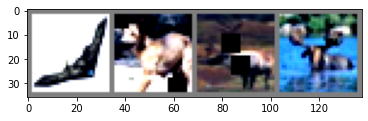

In [4]:
import torchvision
import general_utils

# get some random training images
dataiter = iter(trainloader1)
images, labels = dataiter.next()

# show images
general_utils.imshow(torchvision.utils.make_grid(images))
print('     ','      '.join('%5s' % classes[labels[j]] for j in range(4)))

#Importing torch Summary

In [5]:
from Model_ import resnet
from torchsummary import summary
import cudas
import torch

device = torch.device("cuda" if cudas.cuda else "cpu")
net = resnet.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-

#Define a Loss function, optimizer
#Get LR finder results
Let's use a Classification Cross-Entropy loss and SGD with momentum.

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


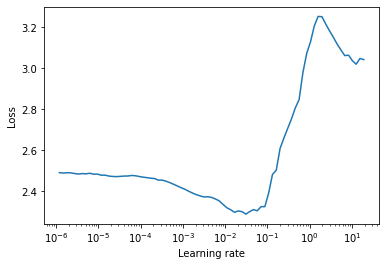

In [6]:
import torch.optim as optim
import torch.nn as nn
import general_utils as gu

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-7, momentum=0.9, weight_decay=0.0001)
gu.lrfinder(net, optimizer, criterion, trainloader)

In [0]:
optimizer = optim.SGD(net.parameters(), lr=1e-1, momentum=0.9, weight_decay=0.0001)

#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1)
#scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [8]:
import torch
from tqdm import tqdm
from Train_Test_utils.traine import train
from Train_Test_utils.teste import test
test_acc = []
train_acc = []
trainloss_ = []
testloss_ = []
loss=1000
loss = 1000
for epoch in range(50):  # loop over the dataset multiple times
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    trainacc, loss = train(net, device, trainloader, optimizer, criterion, epoch)
    train_acc.append(trainacc)
    testacc, loss1 = test(net, device, testloader, criterion)
    test_acc.append(testacc)
    trainloss_.append(loss)
    testloss_.append(loss1)
    scheduler.step(loss1)
print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.1


Epoch= 0 Loss=1.6254093647003174 Batch_id=390 Accuracy=33.75: 100%|██████████| 391/391 [01:21<00:00,  4.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.8531526 Test Accuracy= 38.81
lr=  0.1


Epoch= 1 Loss=1.4794336557388306 Batch_id=390 Accuracy=41.25: 100%|██████████| 391/391 [01:21<00:00,  4.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.0523882 Test Accuracy= 52.29
lr=  0.1


Epoch= 2 Loss=0.9362590909004211 Batch_id=390 Accuracy=68.75: 100%|██████████| 391/391 [01:22<00:00,  4.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.7755239 Test Accuracy= 61.76
lr=  0.1


Epoch= 3 Loss=0.9429727792739868 Batch_id=390 Accuracy=72.50: 100%|██████████| 391/391 [01:22<00:00,  4.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.96791106 Test Accuracy= 67.07
lr=  0.1


Epoch= 4 Loss=0.6623186469078064 Batch_id=390 Accuracy=78.75: 100%|██████████| 391/391 [01:22<00:00,  4.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.54424113 Test Accuracy= 73.15
lr=  0.1


Epoch= 5 Loss=0.6195781826972961 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [01:22<00:00,  4.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.744954 Test Accuracy= 73.94
lr=  0.1


Epoch= 6 Loss=0.6275107860565186 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [01:22<00:00,  4.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.3254022 Test Accuracy= 78.34
lr=  0.1


Epoch= 7 Loss=0.6004434823989868 Batch_id=390 Accuracy=85.00: 100%|██████████| 391/391 [01:22<00:00,  4.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.38975957 Test Accuracy= 79.36
lr=  0.1


Epoch= 8 Loss=0.42891350388526917 Batch_id=390 Accuracy=87.50: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.5504825 Test Accuracy= 80.79
lr=  0.1


Epoch= 9 Loss=0.5145465731620789 Batch_id=390 Accuracy=92.50: 100%|██████████| 391/391 [01:22<00:00,  4.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.1616119 Test Accuracy= 82.07
lr=  0.1


Epoch= 10 Loss=0.2880350649356842 Batch_id=390 Accuracy=92.50: 100%|██████████| 391/391 [01:22<00:00,  4.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.41397363 Test Accuracy= 84.08
lr=  0.1


Epoch= 11 Loss=0.43593764305114746 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [01:22<00:00,  4.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.22372243 Test Accuracy= 82.89
lr=  0.1


Epoch= 12 Loss=0.35621991753578186 Batch_id=390 Accuracy=92.50: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.8261469 Test Accuracy= 83.84
lr=  0.1


Epoch= 13 Loss=0.4854868948459625 Batch_id=390 Accuracy=90.00: 100%|██████████| 391/391 [01:22<00:00,  4.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.64992756 Test Accuracy= 84.22
lr=  0.1


Epoch= 14 Loss=0.12180255353450775 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:22<00:00,  4.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.27887607 Test Accuracy= 85.5
lr=  0.1


Epoch= 15 Loss=0.1769477128982544 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.96237993 Test Accuracy= 83.7
lr=  0.1


Epoch= 16 Loss=0.19742612540721893 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.2971909 Test Accuracy= 85.33
lr=  0.1


Epoch= 17 Loss=0.22523367404937744 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [01:22<00:00,  4.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.046139 Test Accuracy= 85.53
lr=  0.1


Epoch= 18 Loss=0.17615804076194763 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:22<00:00,  4.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.237824 Test Accuracy= 84.72
lr=  0.1


Epoch= 19 Loss=0.25265830755233765 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:22<00:00,  4.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.37775576 Test Accuracy= 86.24
lr=  0.1


Epoch= 20 Loss=0.19610080122947693 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:22<00:00,  4.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.461557 Test Accuracy= 85.84
lr=  0.1


Epoch= 21 Loss=0.2352251559495926 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:22<00:00,  4.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.87015414 Test Accuracy= 85.21
lr=  0.1


Epoch= 22 Loss=0.16227945685386658 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:22<00:00,  4.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.9170389 Test Accuracy= 87.01
lr=  0.1


Epoch= 23 Loss=0.14777974784374237 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.16598956 Test Accuracy= 86.95
lr=  0.05


Epoch= 24 Loss=0.09015773236751556 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.8995914 Test Accuracy= 89.08
lr=  0.05


Epoch= 25 Loss=0.02225586213171482 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.16255 Test Accuracy= 89.26
lr=  0.05


Epoch= 26 Loss=0.013966023921966553 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.20900965 Test Accuracy= 89.23
lr=  0.05


Epoch= 27 Loss=0.06789102405309677 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.50889 Test Accuracy= 88.88
lr=  0.05


Epoch= 28 Loss=0.0036303759552538395 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.2791334 Test Accuracy= 89.06
lr=  0.05


Epoch= 29 Loss=0.04401788115501404 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.0065483153 Test Accuracy= 89.02
lr=  0.05


Epoch= 30 Loss=0.058367639780044556 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.4777031 Test Accuracy= 87.98
lr=  0.05


Epoch= 31 Loss=0.0300698634237051 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.113189965 Test Accuracy= 88.99
lr=  0.05


Epoch= 32 Loss=0.036456115543842316 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.09942904 Test Accuracy= 88.6
lr=  0.05


Epoch= 33 Loss=0.08966468274593353 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.38553128 Test Accuracy= 89.06
lr=  0.05


Epoch= 34 Loss=0.049749214202165604 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.099615544 Test Accuracy= 88.44
lr=  0.05


Epoch= 35 Loss=0.1264914572238922 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.9601653 Test Accuracy= 89.19
lr=  0.025


Epoch= 36 Loss=0.07096259295940399 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:21<00:00,  4.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.24442983 Test Accuracy= 90.05
lr=  0.025


Epoch= 37 Loss=0.08008796721696854 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:21<00:00,  4.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.5520393 Test Accuracy= 90.29
lr=  0.025


Epoch= 38 Loss=0.021195828914642334 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.0320665 Test Accuracy= 90.51
lr=  0.025


Epoch= 39 Loss=0.05388406664133072 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.1203682 Test Accuracy= 90.46
lr=  0.025


Epoch= 40 Loss=0.009337025694549084 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.5681183 Test Accuracy= 89.86
lr=  0.025


Epoch= 41 Loss=0.004477077629417181 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.016188443 Test Accuracy= 90.19
lr=  0.0125


Epoch= 42 Loss=0.0026941478718072176 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.3604582 Test Accuracy= 90.58
lr=  0.0125


Epoch= 43 Loss=0.004304677248001099 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.01424548 Test Accuracy= 90.61
lr=  0.0125


Epoch= 44 Loss=0.020252728834748268 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 1.6267494 Test Accuracy= 90.84
lr=  0.0125


Epoch= 45 Loss=0.001781123923137784 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.23061365 Test Accuracy= 91.09
lr=  0.0125


Epoch= 46 Loss=0.009574413299560547 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:22<00:00,  4.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.050819933 Test Accuracy= 90.88
lr=  0.0125


Epoch= 47 Loss=0.0038098215591162443 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.022385329 Test Accuracy= 91.0
lr=  0.00625


Epoch= 48 Loss=0.0006299972301349044 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test Loss= 0.8339877 Test Accuracy= 90.83
lr=  0.00625


Epoch= 49 Loss=0.001164084649644792 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [01:21<00:00,  4.79it/s]
100%|██████████| 79/79 [00:03<00:00, 22.55it/s]

Test Loss= 0.04693699 Test Accuracy= 91.11
Finished Training


#Plot Train/Test Accuracy and loss

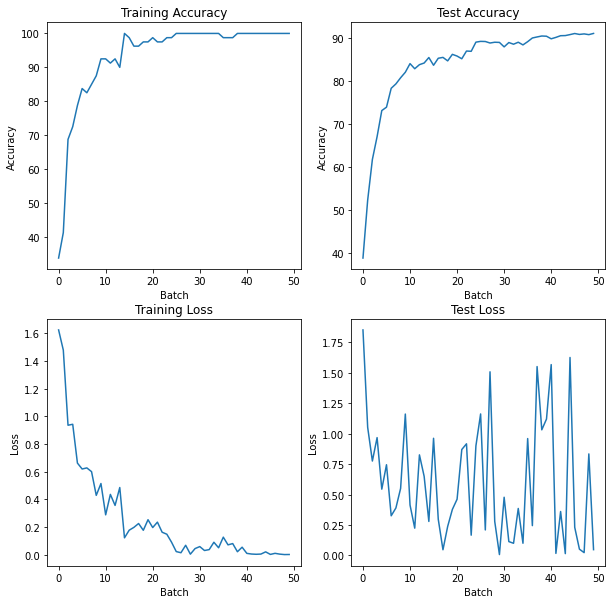

In [9]:
general_utils.plot_acc_loss(train_acc, test_acc, trainloss_, testloss_)

#Groundtruth vs Predictions

GT     frog       frog        dog      plane
Pred   frog       frog        dog      plane


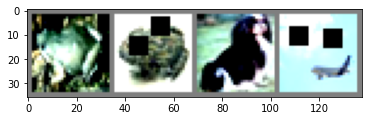

In [10]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

# print images
general_utils.imshow(torchvision.utils.make_grid(images))
print('GT   ', '      '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images.cuda())
_, predicted = torch.max(outputs, 1)
print('Pred ', '      '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



#Categorywise predictions



In [11]:
from Train_Test_utils.teste import test_categorywise
test_categorywise(net, device, testloader, classes)

100%|██████████| 79/79 [00:03<00:00, 21.81it/s]


Accuracy of plane : 94.59 %
Accuracy of   car : 100.00 %
Accuracy of  bird : 76.47 %
Accuracy of   cat : 80.00 %
Accuracy of  deer : 85.71 %
Accuracy of   dog : 86.21 %
Accuracy of  frog : 92.59 %
Accuracy of horse : 97.14 %
Accuracy of  ship : 94.29 %
Accuracy of truck : 100.00 %


#Getting new testloader for gradcam
every time one image comes out

In [15]:
# get the image from the dataloader
testset =  data.getTestDataSet(train=False)
testloader2 = data.getGradCamDataLoader(testset)
it = iter(testloader2)

Files already downloaded and verified


#Finding misclassified images

/content/gdrive/My Drive/Assignment/gradcame.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=3)


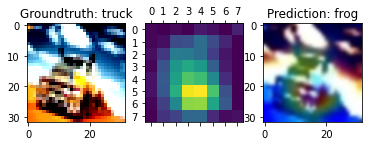

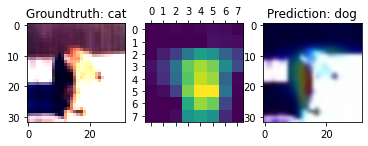

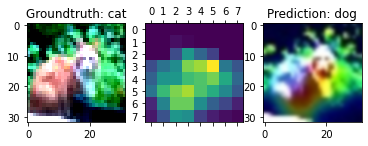

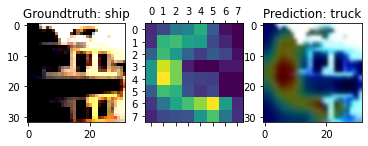

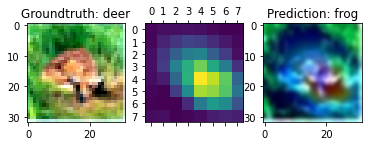

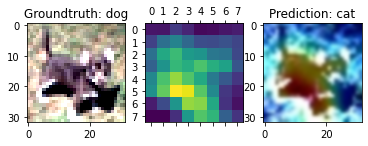

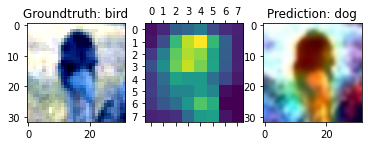

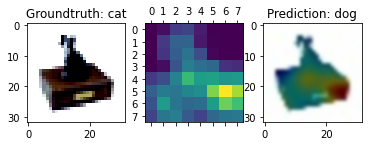

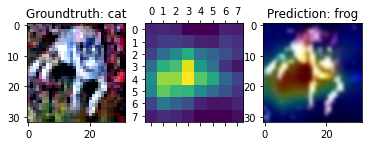

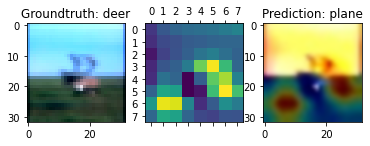

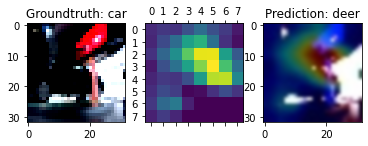

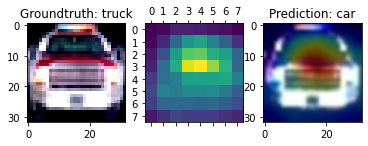

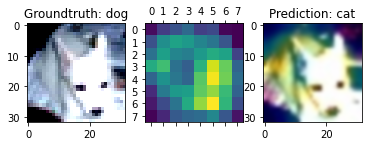

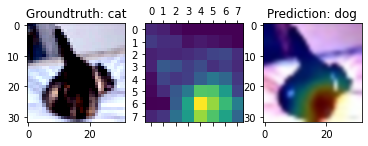

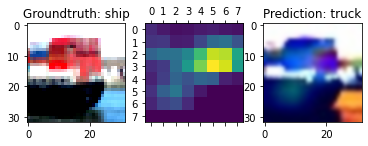

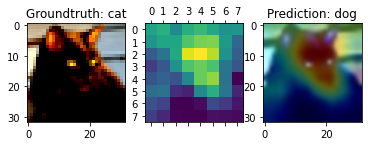

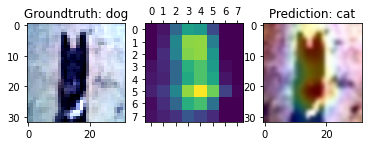

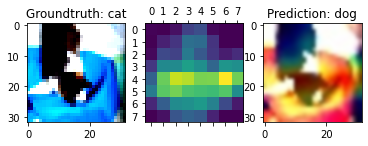

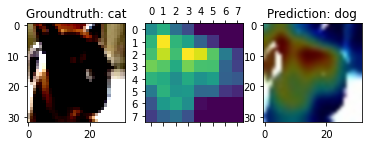

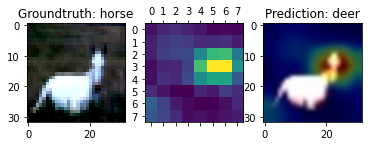

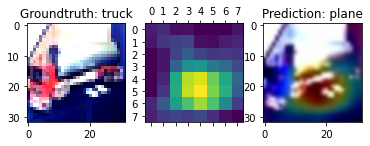

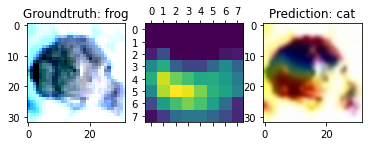

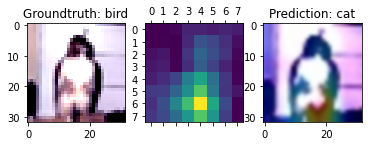

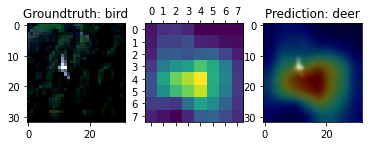

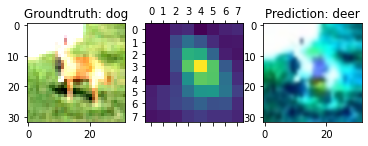

In [17]:
import gradcame
count = 0
while(count != 25):
    images, labels = it.next()
    output = net(images.cuda())
    pred = output.argmax(dim=1, keepdim=True)
    if(classes[pred] != classes[labels]):
      gradcame.gradcamof(net, images, classes, str(classes[labels]), str(classes[pred]))
      count=count+1

#Classified images Gradcam

/content/gdrive/My Drive/Assignment/gradcame.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=3)


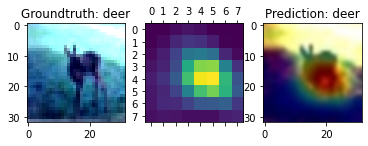

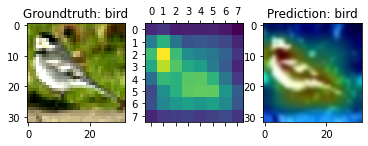

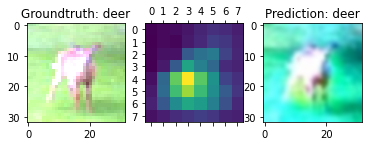

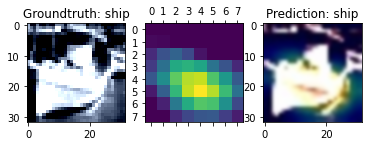

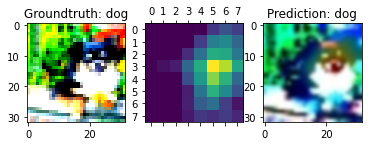

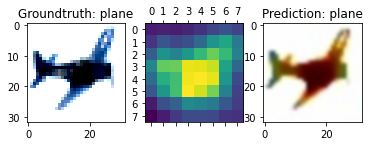

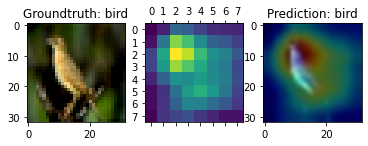

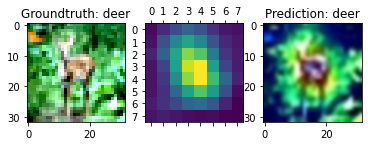

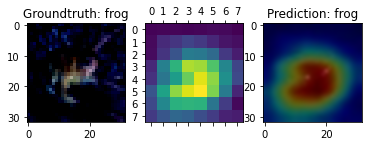

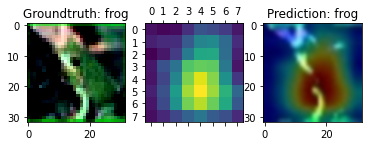

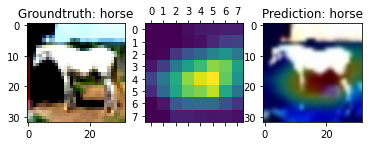

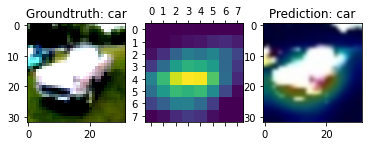

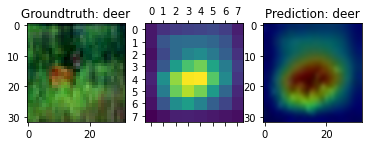

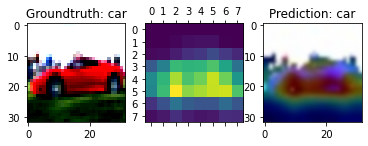

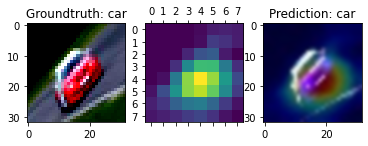

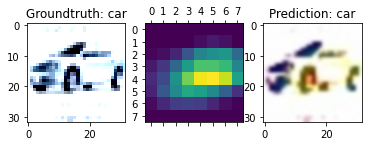

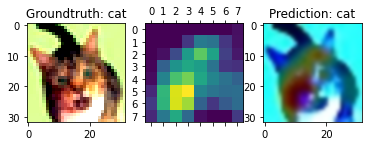

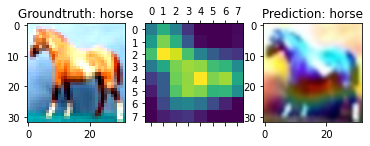

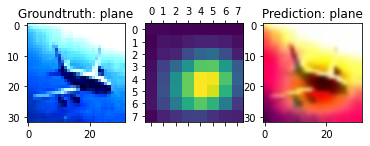

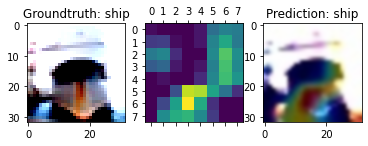

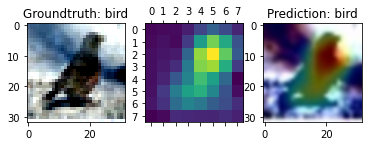

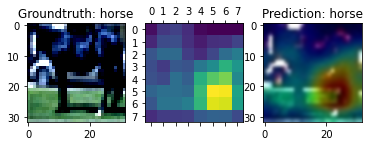

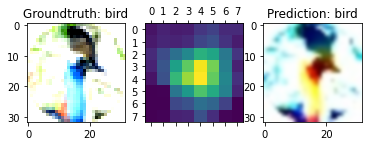

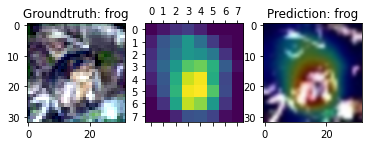

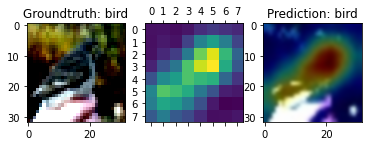

In [18]:
import gradcame
count = 0
while(count != 25):
    images, labels = it.next()
    output = net(images.cuda())
    pred = output.argmax(dim=1, keepdim=True)
    if(classes[pred] == classes[labels]):
      gradcame.gradcamof(net, images, classes, str(classes[labels]), str(classes[pred]))
      count=count+1